# Machine Learning Essentials

Neste notebook em Python, vamos abordar os seguintes tópicos:
- Modelagem preditiva vs. descritiva
- Aprendizado supervisionado vs. não supervisionado
- Conceitos de features e labels
- Divisão de dados: treino/teste e validação cruzada
- Introdução ao uso de pipelines no scikit-learn

# Preditivo vs Descritivo

## 1. Modelos Descritivos

- Objetivo: entender e resumir padrões presentes nos dados.
- Não tentam prever o futuro.
- Exemplos clássicos:
    - Clustering (K-means, DBSCAN)
    - PCA (redução de dimensionalidade)
    - Análise de correlação
    - Regras de associação

## 2. Modelos Preditivos

- Objetivo: prever valores futuros ou desconhecidos.
- Utilizam variáveis explicativas para estimar uma variável alvo.
- Exemplos clássicos:
    - Regressão Linear
    - Random Forest
    - Redes Neuronais
    - SVM

## 3. Tabela comparativa

| Característica     | Descritivo                     | Preditivo                       |
|--------------------|--------------------------------|----------------------------------|
| Objetivo           | Entender padrões               | Prever valores                   |
| Tem variável alvo? | ❌ Não                          | ✅ Sim                            |
| Exemplos           | PCA, Clustering                | Regressão, Classificação         |
| Output típico      | Grupos, componentes            | Probabilidades, valores          |
| Usado para         | Exploração                     | Tomada de decisão                |


## 4. Exemplos

### Kmeans

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/Users/zuilpirola/Downloads/.venv/lib/python3.9/site-packages/traitlets/traitlets.py", line 632, in get
    value = obj._trait_values[self.name]
KeyError: '_control_lock'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/zuilpirola/Downloads/.venv/lib/python3.9/site-packages/zmq/eventloop/zmqstream.py", line 565, in _log_error
    f.result()
  File "/Users/zuilpirola/Downloads/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 301, in dispatch_control
    async with self._control_lock:
  File "/Users/zuilpirola/Downloads/.venv/lib/python3.9/site-packages/traitlets/traitlets.py", line 687, in __get__
    return t.cast(G, self.get(obj, cls))  # the G should encode the Optional
  File "/Users/zuilpirola/Downloads/.venv/lib/python3.9/site-packages/traitlets/traitlets.py", line 649, in get
    value = se

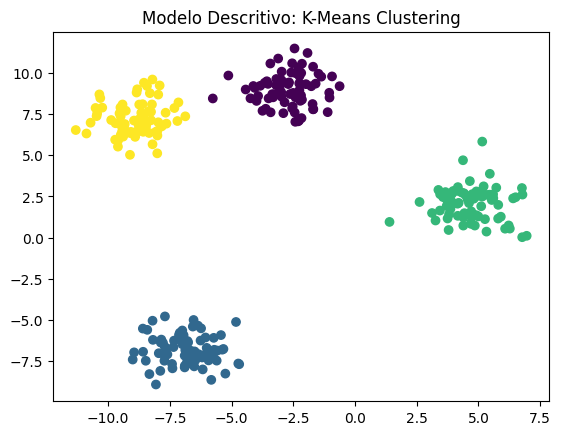

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Modelo Descritivo: K-Means Clustering")
plt.show()


### Regressão Linear

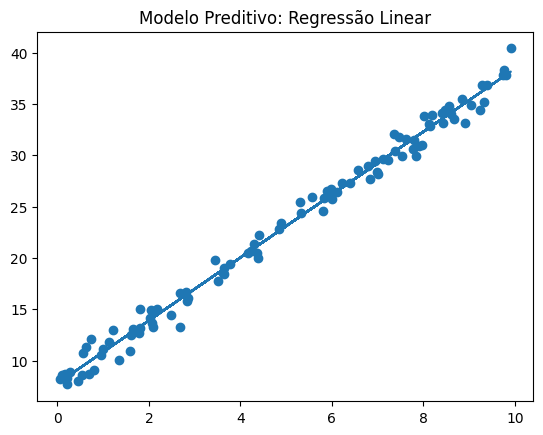

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 8 + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, pred)
plt.title("Modelo Preditivo: Regressão Linear")
plt.show()


# Supervisionado vs Não Supervisionado

## 1. Supervised Learning (Aprendizagem Supervisionada)
- Existe uma variável alvo conhecida.
- O modelo aprende um mapeamento:
    - X→y
- Objetivo: prever rótulos ou valores.
- Exemplos:
    - Regressão Linear / Logística
    - Random Forest
    - SVM
    - Redes Neuronais

## 2. Unsupervised Learning (Aprendizagem Não Supervisionada)
- Não existe variável alvo.
- O objetivo é descobrir estrutura nos dados.
- O modelo aprende:
    - X → padrões/grupos
- Exemplos:
    - K-means
    - PCA
    - DBSCAN
    - Regras de associação

## 3. Tabela comparativa

| Característica        | Supervisionada                     | Não Supervisionada                 |
|-----------------------|-------------------------------------|-------------------------------------|
| Variável alvo         | ✅ Sim                              | ❌ Não                               |
| Objetivo              | Prever valores/rótulos              | Encontrar padrões/estruturas        |
| Dados rotulados       | Necessários                         | Não necessários                     |
| Exemplos              | Regressão, Classificação            | Clustering, PCA                     |
| Output típico         | Predição                            | Grupos, componentes                 |
| Uso típico            | Tomada de decisão                   | Exploração e redução de complexidade|


## 4. Exemplos

In [3]:
from sklearn.datasets import load_iris
# https://www.vertica.com/python/old/documentation_last/datasets/load_iris/index.php
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Carregar dataset Iris
X, y = load_iris(return_X_y=True)

# Dividir dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
# Flores com características semelhantes podem ser do mesmo tipo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_treino, y_treino)

# Fazer previsões
previsoes = modelo.predict(X_teste)
# 0, 1, 2 → setosa, versicolor, virginica
print("Previsões: ", previsoes)
print()
print("Acurácia:", accuracy_score(y_teste, previsoes))


Previsões:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Acurácia: 1.0


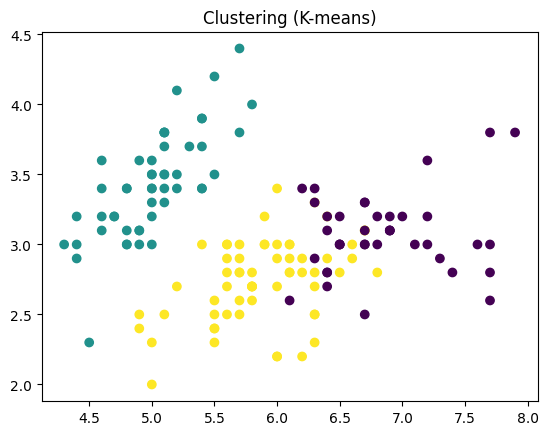

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clustering (K-means)")
plt.show()


# Features and Labels

## 1. Features (características)
- São as variáveis de entrada do modelo.
- Representam propriedades observáveis dos dados.
- Normalmente formam uma matriz X com dimensão:

`n_amostras × n_features`

- Exemplos:
    - Tamanho da casa
    - Idade do cliente
    - Cores numa imagem (pixels)
    - Tempo gasto num website

## 2. Labels (rótulos / alvo)
- São o que queremos prever.
- Também chamados target, y ou variável dependente.
- Podem ser:
    - Numéricos → regressão
    - Categóricos → classificação
- Exemplos:
    - Preço da casa (regressão)
    - Se o cliente vai cancelar (classificação)
    - Que objeto aparece numa imagem (classificação)

As *features* formam a matriz de entrada:

X = [ x11   x12   ...   x1p  <br>
      x21   x22   ...   x2p  <br>
      ...   ...   ...   ...  <br>
      xn1   xn2   ...   xnp ]

Os *labels* são representados por:

y = [ y1 , y2 , ..., yn ]


In [5]:
import pandas as pd

data = pd.DataFrame({
    "tamanho": [50, 80, 120, 60],
    "idade": [10, 20, 5, 30],
    "preco": [100000, 150000, 200000, 120000]
})

data


,tamanho,idade,preco
0,50,10,100000
1,80,20,150000
2,120,5,200000
3,60,30,120000


In [6]:
X = data[["tamanho", "idade"]]   # features
y = data["preco"]                # label

print("Features (X):\n", X)
print("\nLabels (y):\n", y)

Features (X):
    tamanho  idade
0       50     10
1       80     20
2      120      5
3       60     30

Labels (y):
 0    100000
1    150000
2    200000
3    120000
Name: preco, dtype: int64


# Data Splitting: Train/Test e Cross-Validation

Antes de treinar um modelo de Machine Learning, precisamos garantir que ele generaliza bem para dados que nunca viu.
Para isso, dividimos os dados em treino e teste, e às vezes usamos cross-validation para avaliar melhor o desempenho.

## 1. Train/Test Split
- Dividimos os dados em conjunto de treino e conjunto de teste.
- Treino: usado para aprender os parâmetros do modelo.
- Teste: usado para avaliar como o modelo generaliza para dados novos.
- Proporção típica: 70/30, 80/20 ou 75/25.

## 2. Cross-Validation (CV)
- Técnica para avaliar o modelo de forma mais robusta.
- Divide os dados em k folds:
    - Treina em k-1 folds
    - Testa no fold restante
    - Repete k vezes
- Vantagem: reduz variância da avaliação e aproveita melhor os dados.
- Comum: k = 5 ou k = 10.

## 3 . Exemplo em Python

In [7]:
#Train/Test Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Dataset de exemplo
data = pd.DataFrame({
    "tamanho": [50, 80, 120, 60, 90, 70],
    "idade": [10, 20, 5, 30, 15, 8],
    "preco": [100000, 150000, 200000, 120000, 170000, 130000]
})

X = data[["tamanho", "idade"]]
y = data["preco"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 33% dos dados para teste
# 67% dos dados para treino
# random_state para reprodutibilidade

print("X_train:\n", X_train)
print("\nX_test:\n", X_test)


X_train:
    tamanho  idade
5       70      8
2      120      5
4       90     15
3       60     30

X_test:
    tamanho  idade
0       50     10
1       80     20


In [12]:
# Importações
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Inicializar o modelo
model = LinearRegression()

# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # transformar negativo para positivo
print(rmse_scores.mean())


0.24436283021265584


In [13]:
# Exemplos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#
# Fold 1: [1, 2]
# Fold 2: [3, 4]
# Fold 3: [5, 6]
# Fold 4: [7, 8]
# Fold 5: [9, 10]
#
# iteracao 1:
#     Treino: [3, 4, 5, 6, 7, 8, 9, 10]
#     Teste: [1, 2]
#
# iteracao 2:
#     Treino: [1, 2, 5, 6, 7,8, 9, 10]
#     Teste: [3, 4]
#
# iteracao 3:
#     Treino: [1, 2, 3, 4, 7, 8, 9, 10]
#     Teste: [5, 6]
#     ...

| Técnica                | Finalidade                                  | Vantagem                                | Desvantagem                     |
|------------------------|---------------------------------------------|-----------------------------------------|---------------------------------|
| Train/Test Split       | Avaliar generalização em dados não vistos  | Simples, rápido                           | Avaliação depende da divisão    |
| Cross-Validation       | Avaliar desempenho médio em k partições     | Mais robusta, usa melhor todos os dados | Mais custoso computacionalmente |


# Pipeline sklearn

Um Pipeline no Scikit-Learn é uma ferramenta que:
- Organiza e encadeia etapas de ML
- Evita vazamento de dados
- Permite treinar e validar modelos de forma segura
- Facilita ajuste de hiperparâmetros

`pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])`

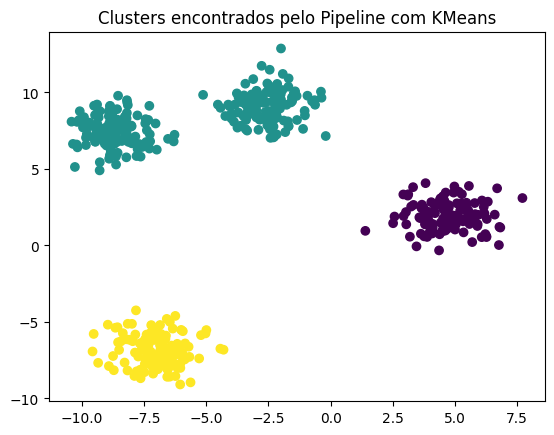

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

pipeline.fit(X)
labels = pipeline['kmeans'].labels_



plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clusters encontrados pelo Pipeline com KMeans")
plt.show()


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data          # features
y = iris.target        # classes

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=500))
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Acurácia:", acc)


Acurácia: 1.0


## 1) O que podemos usar?

Pré-processamento
- StandardScaler
- MinMaxScaler
- Normalizer
- OneHotEncoder
- OrdinalEncoder
...

Seleção de features
- SelectKBest
- SelectPercentile
- RFE
- RFECV
- VarianceThreshold

Redução de dimensionalidade
- PCA
- KernelPCA
- NMF
- TruncatedSVD

## 2) Quem deve ser a última etapa?

A **última etapa** do pipeline pode ser:

---

### ✅ Um Transformer
- Apenas transforma os dados
- É comum em pipelines usados apenas para pré-processamento

---

### ✅ Um Estimador supervisionado
- Precisa implementar `fit()`
- Aceita `predict()`

**Exemplos:**
- `LogisticRegression`
- `SVC`
- `RandomForestClassifier`
- `KNeighborsClassifier`
- `GradientBoosting`
- `XGBClassifier` / `LGBMClassifier` (de bibliotecas externas)

---

### ✅ Um Estimador não supervisionado
- Precisa implementar `fit()`
- Pode ter `predict()` (mas nem sempre)

**Exemplos:**
- `KMeans`
- `DBSCAN` *(não possui `predict()` → o pipeline funciona, mas sem predição direta)*
- `GaussianMixture`
